# Gaussian advection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


## FTCS Method

In [3]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_FTCS=[]
l2norm_FTCS.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

In [4]:
time = np.arange(0.0, t_final + 2*dt, dt)
t_final_values = [3.0,10.0,20.0]
solutions = []

In [5]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Solve the advection equation
while t <= t_final:
    # Check if t is in t_final_values
    if any(abs(t - val) <= dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions.append(u_current.copy())
        
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    # Advance the time
    i += 1
    t = time[i]
    
    #compute the l2 norm and add the time to the time vector
    l2norm_FTCS.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

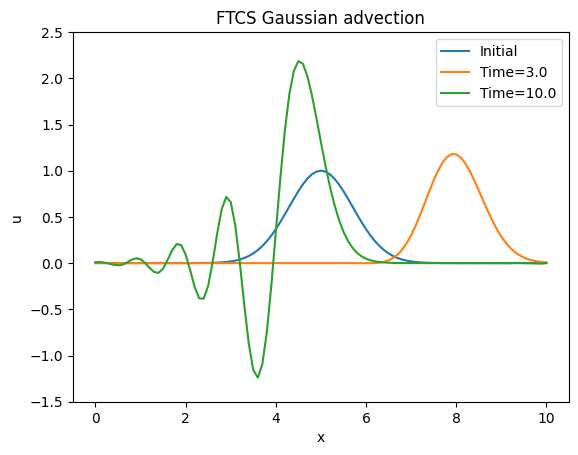

In [6]:
# Plot the two first times
plt.title('FTCS Gaussian advection')
plt.plot(x, u_initial, label='Initial')
plt.plot(x, solutions[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions[1], label='Time=' + str(t_final_values[1]))
plt.ylim(-1.5, 2.5)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Gaussian FTCS (1).png")
plt.show()

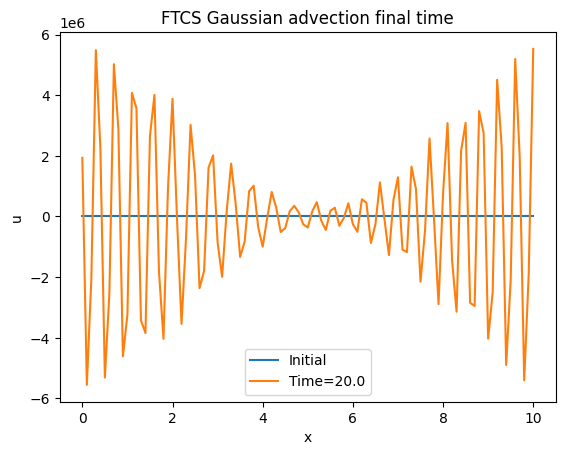

In [7]:
# Plot the final solution
plt.title('FTCS Gaussian advection final time')
plt.plot(x, u_initial, label='Initial')
plt.plot(x, solutions[2], label='Time=' + str(t_final_values[2]))
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Gaussian FTCS (2).png")
plt.show()

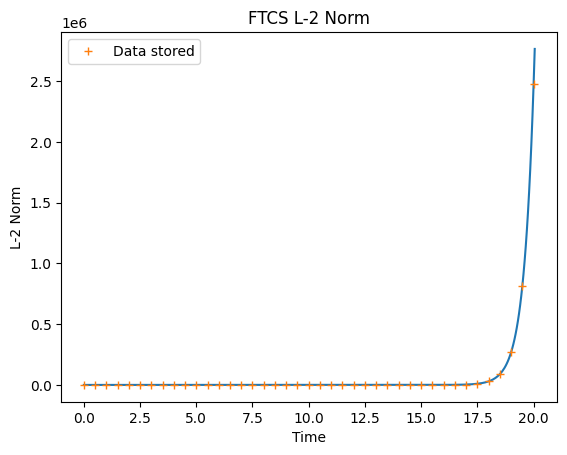

In [8]:
#Compare with data stored
l2_saved_FTCS=np.genfromtxt('./l2norm_FTCS.dat', comments='#')
plt.plot(time,l2norm_FTCS)
plt.plot(l2_saved_FTCS[:,0], l2_saved_FTCS[:,1], '+', label='Data stored')
plt.title('FTCS L-2 Norm')
plt.xlabel('Time')
plt.ylabel('L-2 Norm')
plt.legend()
plt.savefig('FTCS Norm.png')
plt.show()

# Lax-Friedrichs

In [9]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LF=[]
l2norm_LF.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

In [10]:
time = np.arange(0.0, t_final + 2*dt, dt)
t_final_values = [3.0,10.0,20.0]
solutions = []

In [11]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Solve the advection equation
while t <= t_final:
    # Check if t is in t_final_values
    if any(abs(t - val) <= dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions.append(u_current.copy())
    # Compute the new solution using the Lax-Friedrichs method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) 
    
    # Update the solution
    u_current = u_next.copy()
    
    # Advance the time
    i += 1
    t = time[i]
    
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LF.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

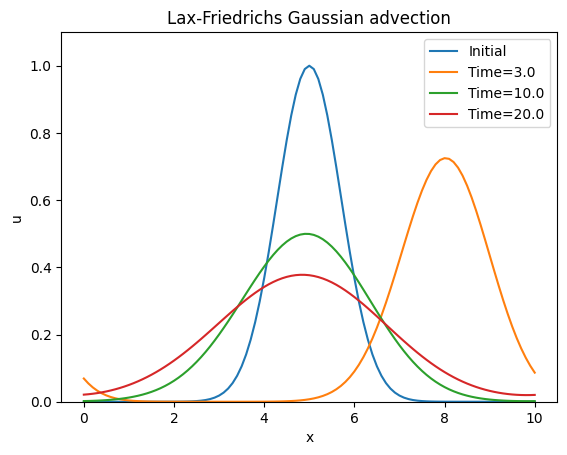

In [12]:
# Plot the final solution
plt.title('Lax-Friedrichs Gaussian advection')
plt.plot(x, u_initial, label='Initial')

for i, solution in enumerate(solutions):
    plt.plot(x, solution, label='Time=' + str(t_final_values[i]))

plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Gaussian Lax-Friedrichs.png")
plt.show()

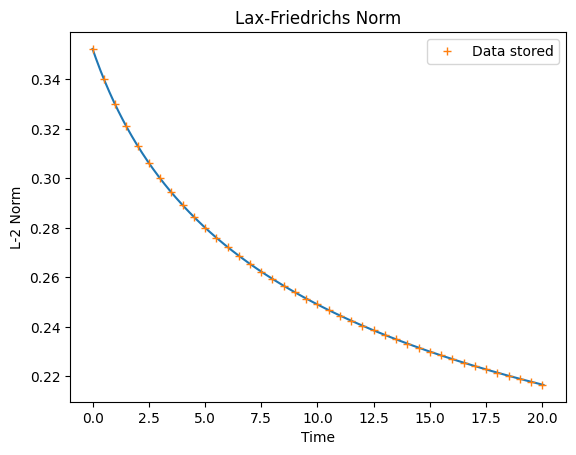

In [13]:
#Compare with data stored
l2_saved_LF=np.genfromtxt('./l2norm_LAX.dat', comments='#')
plt.plot(time,l2norm_LF)
plt.plot(l2_saved_LF[:,0], l2_saved_LF[:,1], '+',label='Data stored')
plt.title('Lax-Friedrichs Norm')
plt.xlabel('Time')
plt.ylabel('L-2 Norm')
plt.savefig('Lax-Friedrichs Norm.png')
plt.legend()
plt.show()

# Leapfrog

In [14]:
# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)
u_initial_2 =  np.exp(-((x+a*dt)-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()
u_previous = u_initial_2.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LP=[]
l2norm_LP.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

In [15]:
time = np.arange(0.0, t_final + 2*dt, dt)
t_final_values = [3.0,10.0,20.0]
solutions = []

In [16]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Solve the advection equation
while t <= t_final:
    # Check if t is in t_final_values
    if any(abs(t - val) <= dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions.append(u_current.copy())
        
    # Compute the new solution using the Leapfrog method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_previous - a*dt/dx*(np.roll(u_current, -1) - np.roll(u_current, 1)) 
    
    # Update the solution
    u_previous = u_current.copy()
    u_current = u_next.copy()
    
    # Advance the time
    i += 1
    t = time[i]
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LP.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

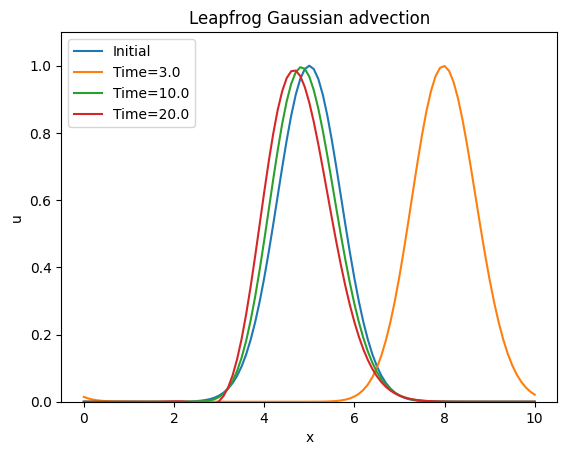

In [17]:
# Plot the final solution
plt.title('Leapfrog Gaussian advection')
plt.plot(x, u_initial, label='Initial')

for i, solution in enumerate(solutions):
    plt.plot(x, solution, label='Time=' + str(t_final_values[i]))

plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Gaussian Leapfrog.png")
plt.show()

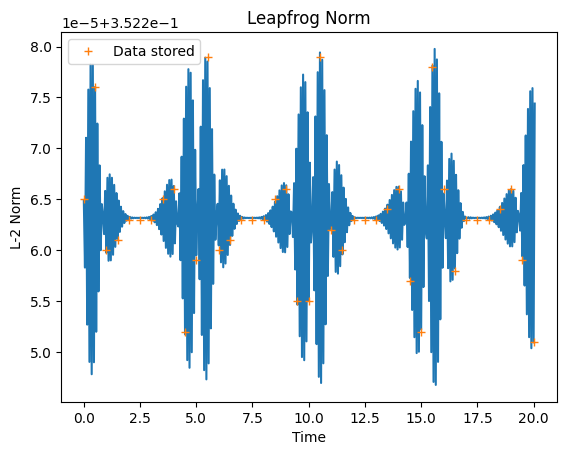

In [18]:
#Compare with data stored
l2_saved_LP=np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')
plt.plot(time,l2norm_LP)
plt.plot(l2_saved_LP[:,0], l2_saved_LP[:,1], '+',label='Data stored')
plt.title('Leapfrog Norm')
plt.xlabel('Time')
plt.ylabel('L-2 Norm')
plt.legend()
plt.savefig('Leapfrog Norm.png')
plt.show()

# Lax-Wendroff

In [19]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LW=[]
l2norm_LW.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

In [20]:
time = np.arange(0.0, t_final + 2*dt, dt)
t_final_values = [3.0,10.0,20.0]
solutions = []

In [21]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Solve the advection equation
while t <= t_final:
    # Check if t is in t_final_values
    if any(abs(t - val) <= dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions.append(u_current.copy())
        
    # Compute the new solution using the Lax-Wendroff method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + ((a*dt/dx)**2/2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))   
    
    # Update the solution
    u_current = u_next.copy()
    
    # Advance the time
    i += 1
    t = time[i]
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LW.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

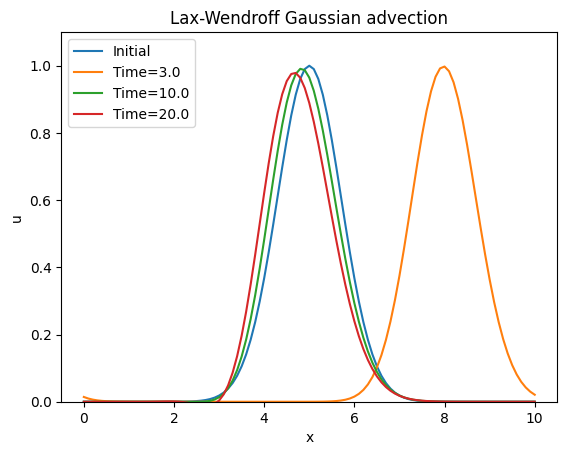

In [22]:
# Plot the final solution
plt.title('Lax-Wendroff Gaussian advection')
plt.plot(x, u_initial, label='Initial')

for i, solution in enumerate(solutions):
    plt.plot(x, solution, label='Time=' + str(t_final_values[i]))

plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Gaussian Lax-Wendroff.png")
plt.show()

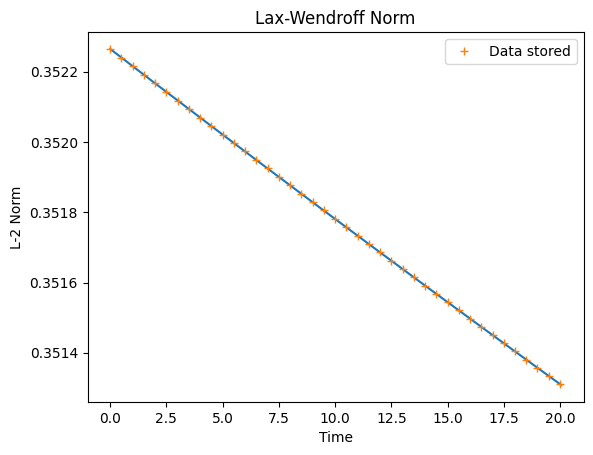

In [23]:
#Compare with data stored
l2_saved_LW=np.genfromtxt('./l2norm_LAXWENDROFF.dat', comments='#')
plt.plot(time,l2norm_LW)
plt.plot(l2_saved_LW[:,0], l2_saved_LW[:,1], '+',label='Data stored')
plt.title('Lax-Wendroff Norm')
plt.xlabel('Time')
plt.ylabel('L-2 Norm')
plt.savefig('Lax-Wendroff Norm.png')
plt.legend()
plt.show()

# Changing the Courant Number

## LF

In [24]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LF_DC=[]
l2norm_LF_DC.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

In [25]:
cf_array = [0.25,0.5,0.75,0.9,1.25]
solutions = []

In [26]:
for cf in cf_array:
    
    # Initialize the solution array
    u_current = u_initial.copy()
    
    dt = cf*dx/a   # Time step
    time = np.arange(0.0, t_final + 2*dt, dt)
    
    # Initilize time and iteration counter
    t = 0.0
    i = 0

    # Solve the advection equation
    while t <= t_final:

        # Compute the new solution using the Lax-Friedrichs method
        # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
        #       np.roll(u_current,  1) is equivalent to u(j-1)
        # using np.roll is equivalent to use periodic boundary conditions
        u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) 

        # Update the solution
        u_current = u_next.copy()

        # Advance the time
        i += 1
        t = time[i]

        #compute the l2 norm and add the time to the time vector
        l2norm_LF_DC.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
        
    solutions.append(u_current.copy())

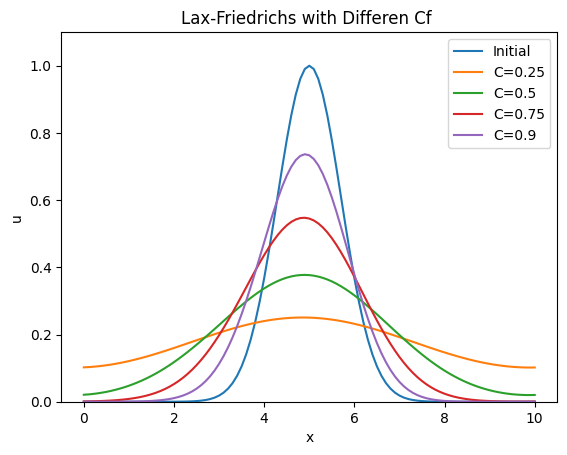

In [27]:
# Plot the final solution
plt.title('Lax-Friedrichs with Differen Cf ')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions[0], label='C=' + str(cf_array[0]))
plt.plot(x, solutions[1], label='C=' + str(cf_array[1]))
plt.plot(x, solutions[2], label='C=' + str(cf_array[2]))
plt.plot(x, solutions[3], label='C=' + str(cf_array[3]))

plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Courant Lax-Friedrichs (1).png")
plt.show()

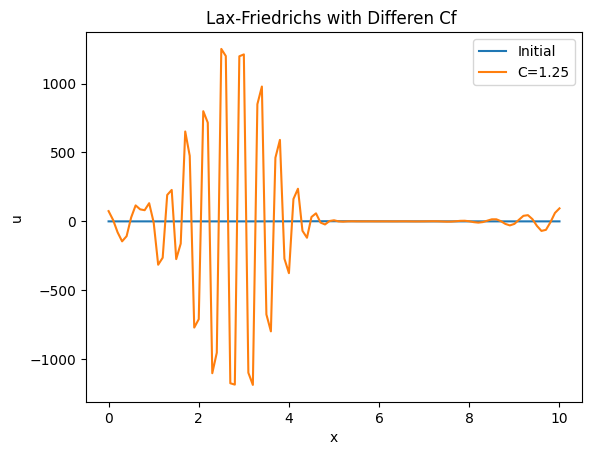

In [28]:
# Plot the final solution
plt.title('Lax-Friedrichs with Differen Cf ')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions[-1], label='C=' + str(cf_array[-1]))

plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Courant Lax-Friedrichs (2).png")
plt.show()

## LP

In [29]:
# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)
u_initial_2 =  np.exp(-((x+a*dt)-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()
u_previous = u_initial_2.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LP_DC=[]
l2norm_LP_DC.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

In [30]:
cf_array = [0.25,0.5,0.75,0.9,1.25]
solutions = []

In [31]:
for cf in cf_array:
    
    # Initialize the solution array
    u_current = u_initial.copy()
    u_previous = u_initial_2.copy()
    
    dt = cf*dx/a   # Time step
    time = np.arange(0.0, t_final + 2*dt, dt)
    
    # Initilize time and iteration counter
    t = 0.0
    i = 0

    # Solve the advection equation
    while t <= t_final:

        # Compute the new solution using the Lax-Friedrichs method
        # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
        #       np.roll(u_current,  1) is equivalent to u(j-1)
        # using np.roll is equivalent to use periodic boundary conditions
        u_next = u_previous - a*dt/dx*(np.roll(u_current, -1) - np.roll(u_current, 1)) 
    
        # Update the solution
        u_previous = u_current.copy()
        u_current = u_next.copy()
    

        # Advance the time
        i += 1
        t = time[i]

        #compute the l2 norm and add the time to the time vector
        l2norm_LP_DC.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
        
    solutions.append(u_current.copy())

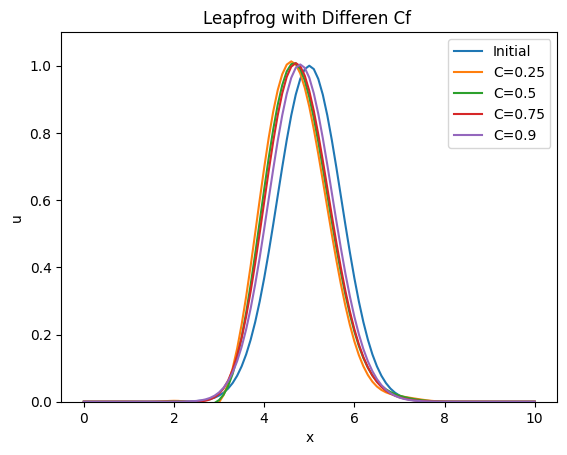

In [32]:
# Plot the final solution
plt.title('Leapfrog with Differen Cf ')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions[0], label='C=' + str(cf_array[0]))
plt.plot(x, solutions[1], label='C=' + str(cf_array[1]))
plt.plot(x, solutions[2], label='C=' + str(cf_array[2]))
plt.plot(x, solutions[3], label='C=' + str(cf_array[3]))

plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Courant Leapfrog (1).png")
plt.show()

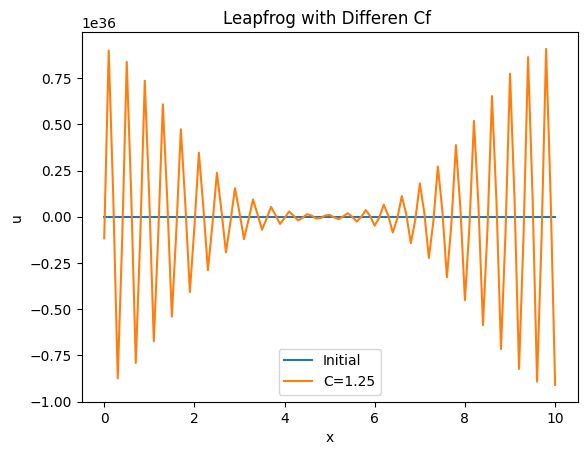

In [33]:
# Plot the final solution
plt.title('Leapfrog with Differen Cf ')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions[-1], label='C=' + str(cf_array[-1]))

plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Courant Leapfrog (2).png")
plt.show()

## LW

In [34]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LW_DC=[]
l2norm_LW_DC.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

In [35]:
for cf in cf_array:
    
    # Initialize the solution array
    u_current = u_initial.copy()
    
    dt = cf*dx/a   # Time step
    time = np.arange(0.0, t_final + 2*dt, dt)
    
    # Initilize time and iteration counter
    t = 0.0
    i = 0

    # Solve the advection equation
    while t <= t_final:

        # Compute the new solution using the Lax-Friedrichs method
        # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
        #       np.roll(u_current,  1) is equivalent to u(j-1)
        # using np.roll is equivalent to use periodic boundary conditions
        u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) 

        # Update the solution
        u_current = u_next.copy()

        # Advance the time
        i += 1
        t = time[i]

        #compute the l2 norm and add the time to the time vector
        l2norm_LW_DC.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
        
    solutions.append(u_current.copy())

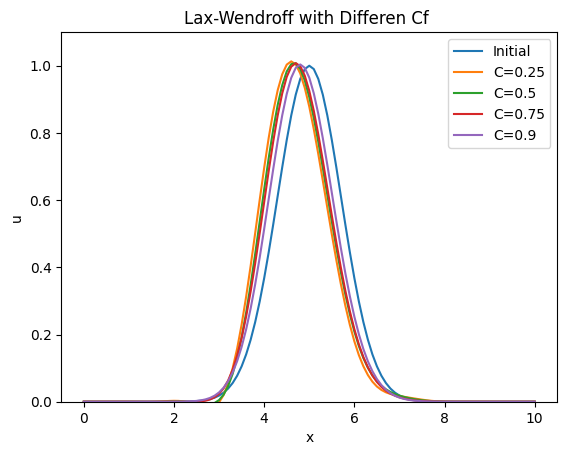

In [36]:
# Plot the final solution
plt.title('Lax-Wendroff with Differen Cf ')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions[0], label='C=' + str(cf_array[0]))
plt.plot(x, solutions[1], label='C=' + str(cf_array[1]))
plt.plot(x, solutions[2], label='C=' + str(cf_array[2]))
plt.plot(x, solutions[3], label='C=' + str(cf_array[3]))

plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Courant Lax-Wendroff (1).png")
plt.show()

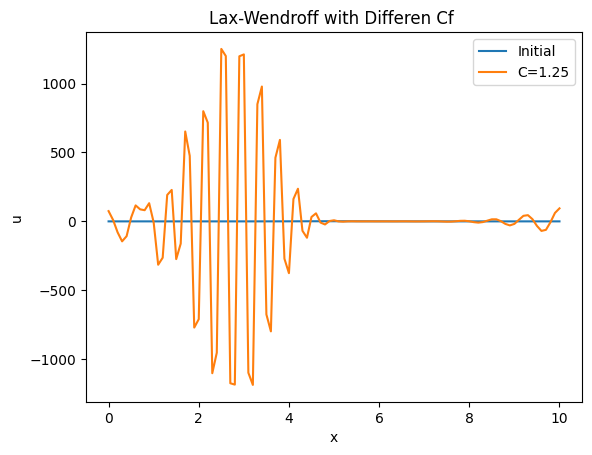

In [37]:
# Plot the final solution
plt.title('Lax-Wendroff with Differen Cf ')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions[-1], label='C=' + str(cf_array[-1]))

plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig("Courant Lax-Wendroff (2).png")
plt.show()